### Import libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler  # or use StandardScaler



## 1. Data understanding and preprocessing

### Load and explore application.csv

In [ ]:
df = pd.read_csv("application_train.csv", on_bad_lines='skip')

df.head()

### Data Preprocessing

In [ ]:
print("*Column Names:*")
print(df.columns)
print("-----------------------------------------------------------------")
print("First 5 rows of the data")
print(df.head(5))
print("-----------------------------------------------------------------")
print("Null values ie one marked with NaN")
print(df.isnull().sum())
print("-----------------------------------------------------------------")

*Column Names:*
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
-----------------------------------------------------------------
First 5 rows of the data
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0       

In [ ]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


### Handle missing values

In [ ]:
missing_values = df.isnull()

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

print("Columns with missing values:")
print(missing_counts[missing_counts > 0])

Missing values in each column:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
Columns with missing values:
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64


In [ ]:
non_missing_values = df.notnull()

non_missing_counts = df.notnull().sum()
print("Non-missing values in each column:")
print(non_missing_counts)

Non-missing values in each column:
SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64


In [ ]:
missingrows=(df[df.isnull().any(axis=1)])
missingrows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#import missingno as msno
#msno.matrix(df)

In [ ]:
df.shape

(307511, 122)

***Data Cleaning***

filling missing numercal cols and dropping columns with a large amount of missing values


In [ ]:
# Calculate missing percentage per column
missingpercentage = df.isnull().mean() * 100

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# missing > 30%
dropcols = missingpercentage[numeric_cols][missingpercentage[numeric_cols] > 30].index

# Drop those columns
print("Dropping columns due to >30% missing values:")
print(list(dropcols))
df.drop(columns=dropcols, inplace=True)

# missing <= 30%
fillcols = missingpercentage[numeric_cols][missingpercentage[numeric_cols] <= 30].index

# Fill missing values with mean
for col in fillcols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)


Dropping columns due to >30% missing values:
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE']


C:\Users\s9010\AppData\Local\Temp\ipykernel_520\1496790215.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [ ]:
df.isnull().sum().sum()

np.int64(764371)

In [ ]:
# Row-wise
# Calculate missing percentage per row
missing_row_percentage = df.isnull().mean(axis=1) * 100

# Drop rows with >30% missing values
rows_to_drop = df[missing_row_percentage > 30].index
print(f"\nDropping {len(rows_to_drop)} rows due to >30% missing values.")
df.drop(index=rows_to_drop, inplace=True)

# Fill remaining missing numeric values row-wise using column mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)



Dropping 0 rows due to >30% missing values.


C:\Users\s9010\AppData\Local\Temp\ipykernel_520\2381356882.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### Cleaning Categorical Cols

In [ ]:
#printing categorical coloumns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


### Filling missing categorical cols

In [ ]:

# Calculate missing percentage
missing_cat_percentage = df[categorical_cols].isnull().mean() * 100
missing_cat_percentage = missing_cat_percentage[missing_cat_percentage > 0]

#Drop categorical columns with >30% missing
drop_cat_cols = missing_cat_percentage[missing_cat_percentage > 30].index
df.drop(columns=drop_cat_cols, inplace=True)

# columns with mode
fill_cat_cols = missing_cat_percentage[missing_cat_percentage <= 30].index
for col in fill_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Dropped categorical columns with >30% missing:")
print(drop_cat_cols.tolist())

print("\nFilled categorical columns with <=30% missing using mode:")
print(fill_cat_cols.tolist())


Dropped categorical columns with >30% missing:
['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Filled categorical columns with <=30% missing using mode:
['NAME_TYPE_SUITE']


In [ ]:
df.shape

(307511, 72)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

Outliers Detection

In [ ]:
import os 
os.makedirs('results', exist_ok=True)


In [ ]:
outlier_detection = os.path.join('results', 'outlier_detection')
os.makedirs(outlier_detection, exist_ok=True)

In [ ]:
#visualizing outliers
for column in df.columns:
    if df[column].dtype in ['float64']:
        plt.figure(figsize=(5, 1))
        sns.boxplot(x=df[column])
        save_path = os.path.join("results", "outlier_detection", f"{column}_boxplot.png")
        plt.savefig(save_path, bbox_inches='tight')
		plt.close

#coloumns with outliers
for column in df.columns:
    if df[column].dtype in ['float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print("\n..........................................")

        if len(outliers) > 0:
            print(f"Outliers in '{column}':")
            print(f"Number of outliers in '{column}': {len(outliers)}")



TabError: inconsistent use of tabs and spaces in indentation (<string>, line 8)

### cols after removing outliers

In [ ]:
df.shape

(307511, 72)

In [ ]:
outlier_detection = os.path.join('results', 'outliers_removed')
os.makedirs(outlier_detection, exist_ok=True)

In [ ]:
for column in df.columns:
    if df[column].dtype == 'float64':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


#visualizing outliers after fixing outliers
print("cols after outliers are removed:\n")
for column in df.columns:
    if df[column].dtype in ['float64']:
        plt.figure(figsize=(5, 1))
        sns.boxplot(x=df[column])
        save_path = os.path.join("results", "outliers_removed", f"{column}_boxplot.png")
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()


cols after outliers are removed:



***One-Hot Encoding***

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:

threshold = 0.4 * len(df)
df.drop(columns=df.columns[df.isnull().sum() > threshold], inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

#categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", list(cat_cols))

# One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


#converting bool to int since its impacting further calc
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})


print("\nEncoded DataFrame shape:", df.shape)
df.head()



Categorical columns to encode: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

Encoded DataFrame shape: (307511, 156)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
missing_counts = df.isnull().sum().sum()
print("Missing values in  column:")
print(missing_counts)

Missing values in  column:
0


In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=156)

In [ ]:
df.shape

(307511, 156)

****Feature ENGINEERIN****

In [ ]:
# #Convert DAYS_EMPLOYED to years:
# df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: x if x < 0 else np.nan) // -365
# df['EMPLOYED_RATIO'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']

# #INCOME to credit ratio
# df['INCOME_CREDIT_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']

# # Annuity to Income Ratio
# df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']



In [ ]:
df.shape

(307511, 156)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

****Exploratory Data Analysis****

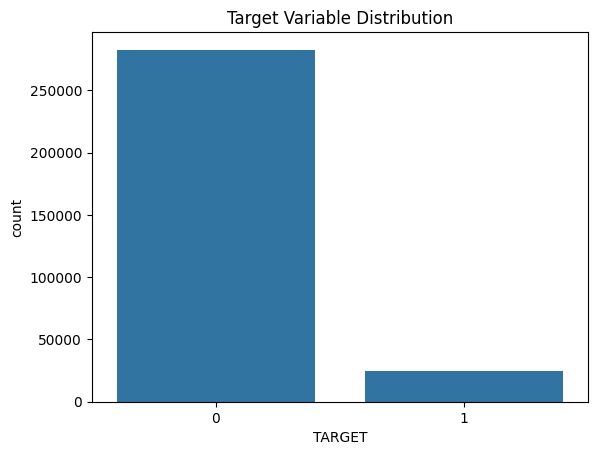

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=df)
plt.title("Target Variable Distribution")
plt.show()

# Percentage of defaults
print(df['TARGET'].value_counts(normalize=True) * 100)


In [ ]:
df['FLAG_DOCUMENT_5'].nunique()


2

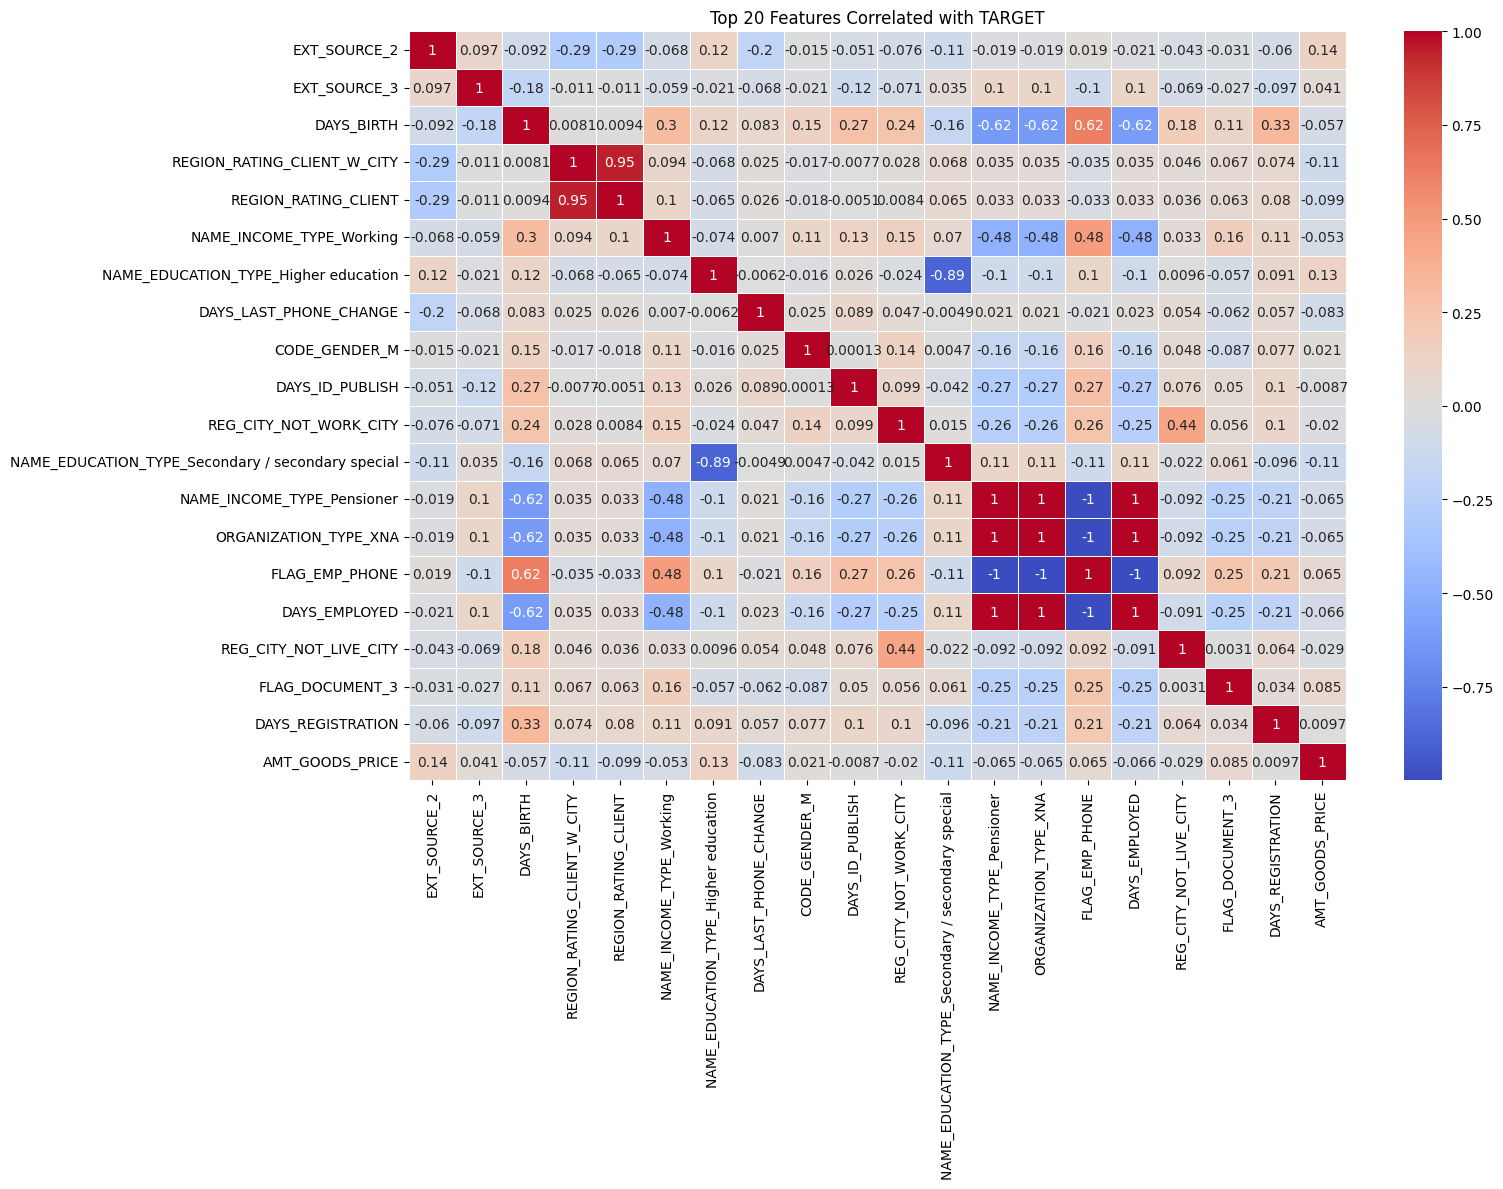

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ccorrelation matrix
corr = df.corr()

# Sort  most correlated with TARGET
top_corr = corr['TARGET'].abs().sort_values(ascending=False)

# selecting top 20 only
top_features = top_corr[1:21].index  # skipping index 0 (TARGET)


top_corr_matrix = df[top_features].corr()


plt.figure(figsize=(16, 12))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Top 20 Features Correlated with TARGET")
plt.tight_layout()
plt.savefig('results/correlation.png')
plt.show()


In [ ]:
# df.corr()['NAME_INCOME_TYPE_Pensioner'].sort_values(ascending=False).head(10)


In [ ]:
# df.corr()['FLAG_EMP_PHONE'].sort_values(ascending=False).head(10)


In [ ]:
df['ORGANIZATION_TYPE_XNA'].value_counts()
df.drop(columns=['ORGANIZATION_TYPE_XNA'], inplace=True) #dropping since VIF values is very high

#df['DAYS_EMPLOYED'].value_counts().head(10)
#  Drop the raw column
#df.drop(columns=['DAYS_EMPLOYED'], inplace=True)

#df.drop(columns=['FLAG_EMP_PHONE'], inplace=True)

df.drop(columns=['NAME_INCOME_TYPE_Pensioner'], inplace=True)


### Mutual information graph

C:\Users\s9010\AppData\Local\Temp\ipykernel_14852\1277201383.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_normalized.head(20), y=mi_normalized.head(20).index, palette='coolwarm')



Interpretation Guide:
• Score > 0.5 → Very informative
• Score 0.2 - 0.5 → Somewhat informative
• Score < 0.1 → Little to no contribution


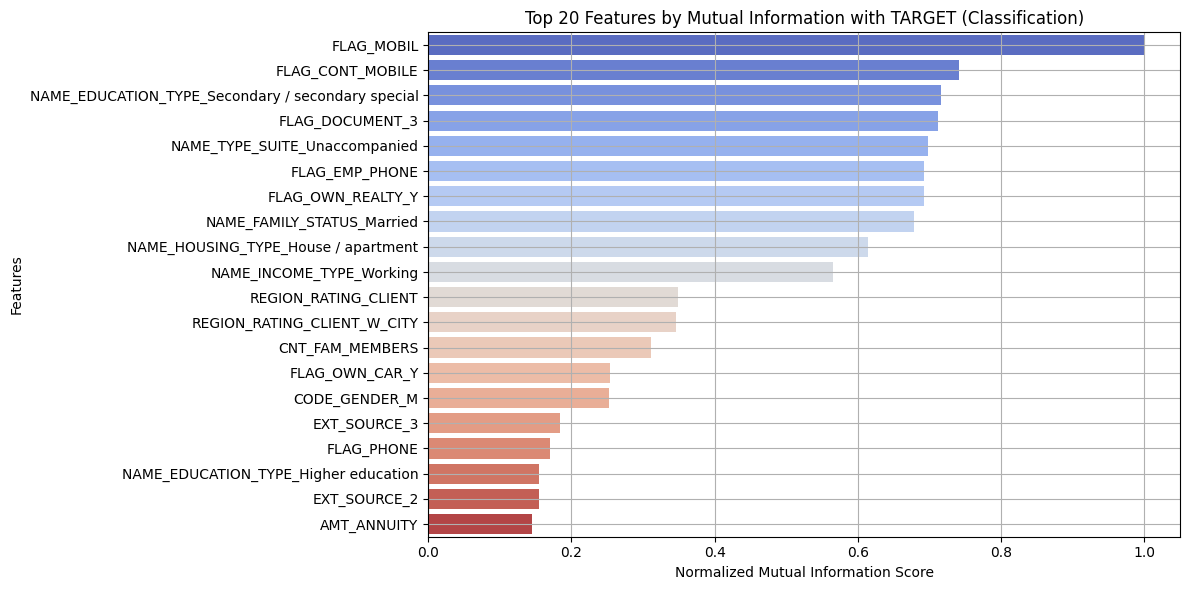

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Compute mutual information for classification
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Convert to Series and normalize
mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_normalized = (mi - mi.min()) / (mi.max() - mi.min())

# Plot the top 20 features
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_normalized.head(20), y=mi_normalized.head(20).index, palette='coolwarm')
plt.title("Top 20 Features by Mutual Information with TARGET (Classification)")
plt.xlabel("Normalized Mutual Information Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()

# Print scoring interpretation
print("\nInterpretation Guide:")
print("• Score > 0.5 → Very informative")
print("• Score 0.2 - 0.5 → Somewhat informative")
print("• Score < 0.1 → Little to no contribution")

plt.show()


In [ ]:
cor= df.corr(numeric_only=True)['TARGET'].drop('TARGET').sort_values(ascending=False)
print(cor)

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
NAME_INCOME_TYPE_Working       0.057481
DAYS_LAST_PHONE_CHANGE         0.055236
                                 ...   
DEF_30_CNT_SOCIAL_CIRCLE            NaN
DEF_60_CNT_SOCIAL_CIRCLE            NaN
AMT_REQ_CREDIT_BUREAU_HOUR          NaN
AMT_REQ_CREDIT_BUREAU_DAY           NaN
AMT_REQ_CREDIT_BUREAU_WEEK          NaN
Name: TARGET, Length: 153, dtype: float64


In [ ]:

# identify features with NaN correlation
nan_corr_features = cor[cor.isna()].index.tolist()

# drop those columns from the original dataframe
df_cleaned = df.drop(columns=nan_corr_features)

print("Dropped columns due to NaN correlation:", nan_corr_features)


Dropped columns due to NaN correlation: ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK']


In [ ]:
column_names = df_cleaned.columns.tolist()
print(column_names)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT

In [ ]:
# Apply One-Hot Encoding to all categorical columns
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

In [ ]:
# # Separate features (X) and target variable (y)
# X = df_encoded.drop(columns=['TARGET'])
# y = df_encoded['TARGET']

# # Now calculate the mutual information
# from sklearn.feature_selection import mutual_info_classif

# # Calculate mutual information
# mutual_info = mutual_info_classif(X, y)

# # Create a DataFrame to display the feature importances
# mutual_info_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Mutual Information': mutual_info
# })

# # Sort the features by mutual information in descending order
# mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# # Display the top 10 features
# print(mutual_info_df.head(10))

In [ ]:
# Check for missing values in the feature set (X)
print(X.isnull().sum())

SK_ID_CURR                             0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT                             0
AMT_ANNUITY                            0
                                      ..
ORGANIZATION_TYPE_Transport: type 1    0
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
Length: 153, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select top 20 features
top_20_features = mi.head(20).index.tolist()
X_top20 = X[top_20_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

depths = range(1, 21)
accuracy_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # or use 'f1', 'roc_auc'
    accuracy_scores.append(scores.mean())

plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy (CV)')
plt.title('Selecting Optimal Tree Depth')
plt.grid(True)
plt.savefig('results/optimal_tree_depth.png')
plt.show()


NameError: name 'X_train' is not defined

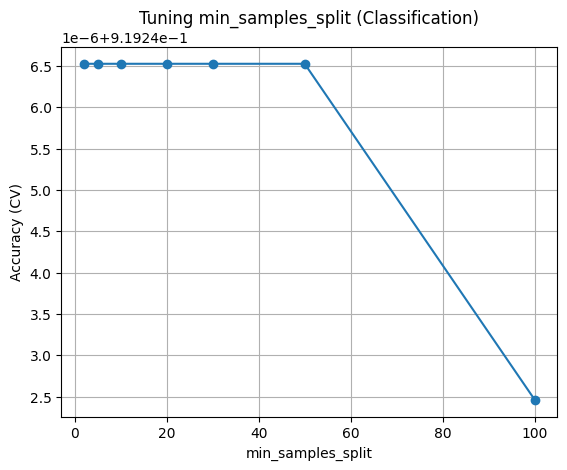

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

min_splits = [2, 5, 10, 20, 30, 50, 100]
accuracy_scores_split = []

for min_split in min_splits:
    model = DecisionTreeClassifier(max_depth=5, min_samples_split=min_split, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # or 'f1', 'roc_auc'
    accuracy_scores_split.append(scores.mean())

plt.plot(min_splits, accuracy_scores_split, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy (CV)')
plt.title('Tuning min_samples_split (Classification)')
plt.grid(True)
plt.show()


In [ ]:

# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=4,min_samples_split = 20,class_weight='balanced',random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[40879 15659]
 [ 2069  2896]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     56538
           1       0.16      0.58      0.25      4965

    accuracy                           0.71     61503
   macro avg       0.55      0.65      0.53     61503
weighted avg       0.89      0.71      0.78     61503

Accuracy Score: 0.7117538981838284


Precision: 0.1561
Recall: 0.5833
F1 Score: 0.2463
Precision-Recall AUC: 0.1752

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     56538
           1       0.16      0.58      0.25      4965

    accuracy                           0.71     61503
   macro avg       0.55      0.65      0.53     61503
weighted avg       0.89      0.71      0.78     61503



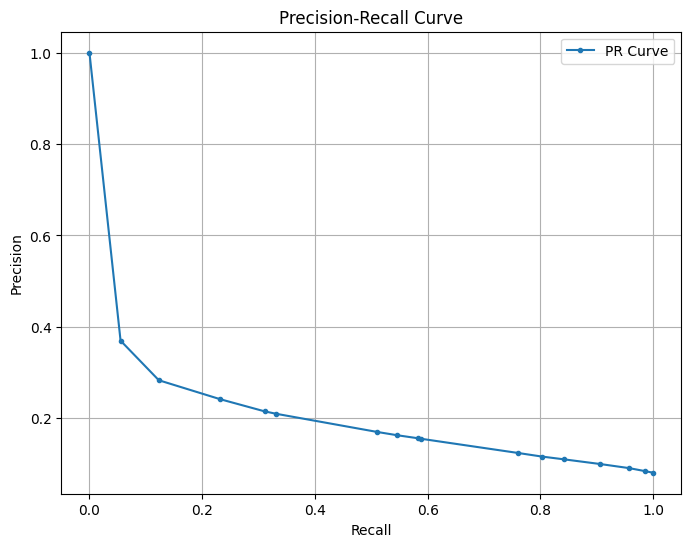

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities (not hard predictions)
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = model.predict(X_test)              # Default threshold = 0.5

# Step 2: Basic metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_probs)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("Precision-Recall AUC:", round(pr_auc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 3: Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig('results/precision_recall_curve.png')
plt.show()


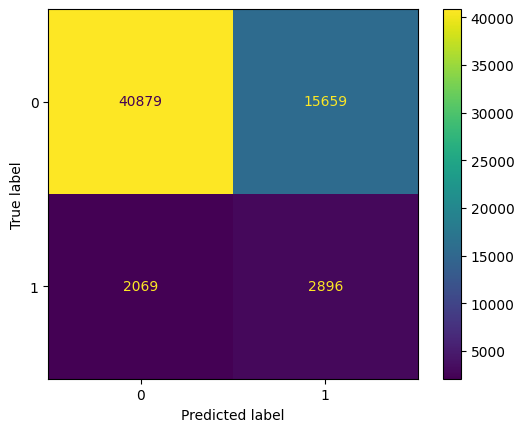

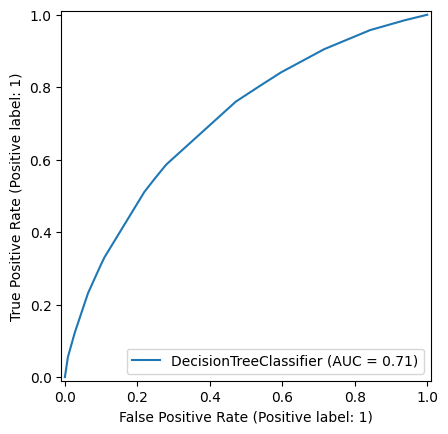

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.savefig("results/confusion_matrix.png", bbox_inches='tight')
plt.close()

# ROC Curve
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.savefig("results/roc_curve.png", bbox_inches='tight')
plt.close()

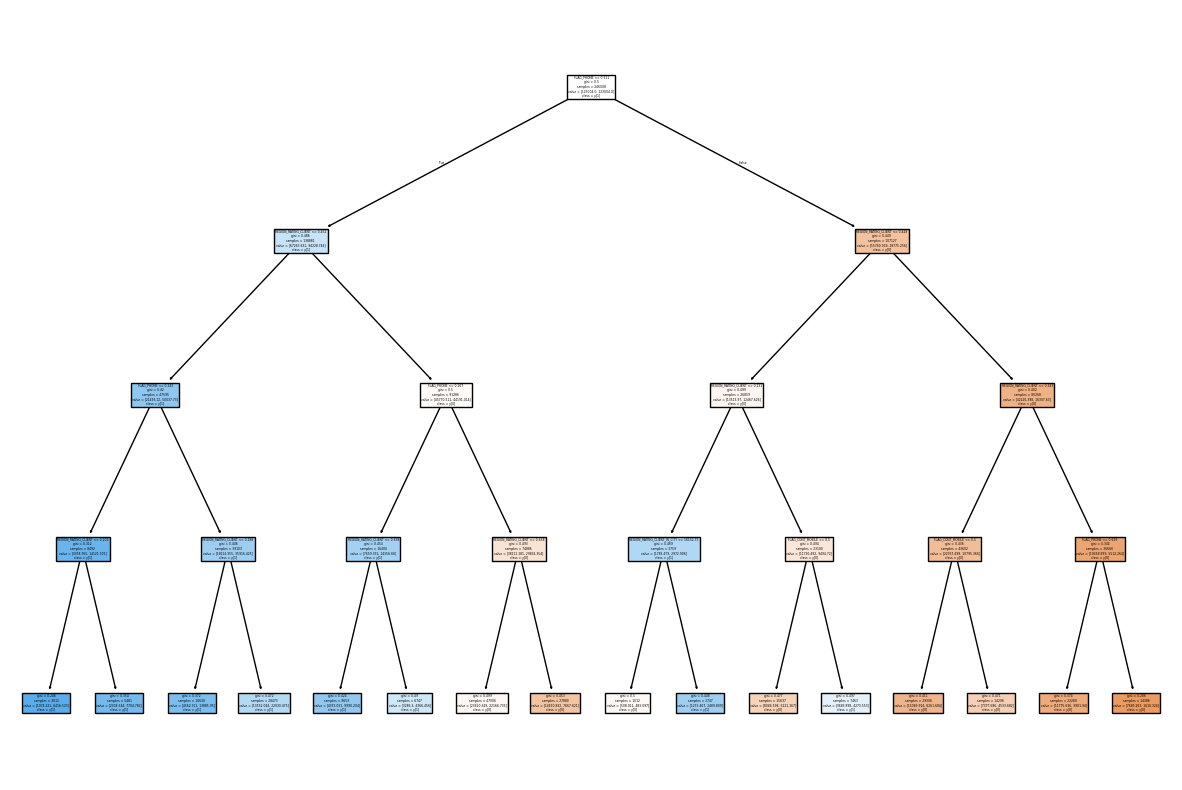

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=True)
plt.savefig('results/decision_tree.png')
plt.show()


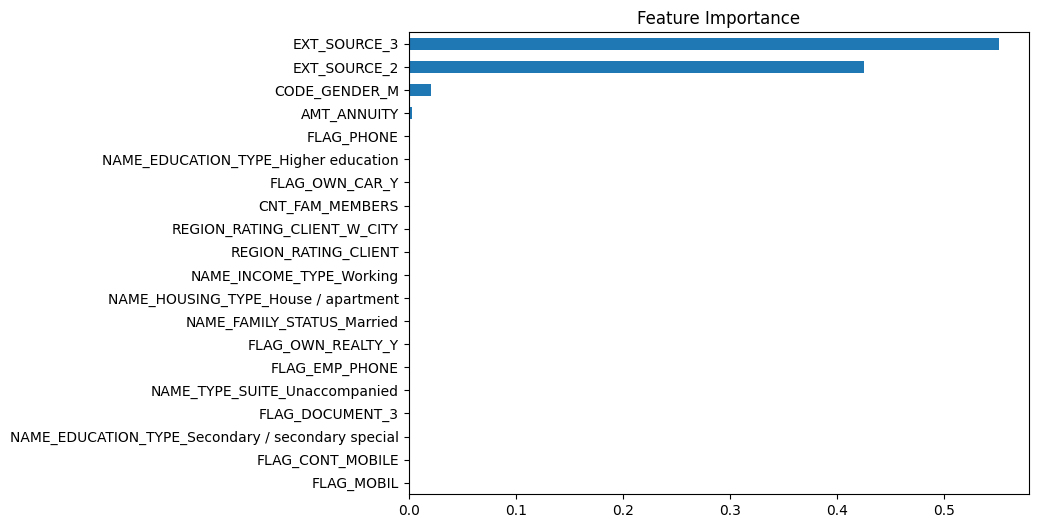

In [ ]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X_test.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), title="Feature Importance")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.9185242996276605


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Step 1: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Initialize the Decision Tree Classifier
# clf = DecisionTreeClassifier(class_weight= 'balanced', max_depth= 5, random_state=42)

# # Step 3: Train the model
# clf.fit(X_train, y_train)

# # Step 4: Make predictions
# y_pred = clf.predict(X_test)

# # Step 5: Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
import pickle

with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Step 1: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# # Step 2: Initialize the Decision Tree Classifier
# clf = DecisionTreeClassifier(random_state=42)

# # Step 3: Train the model
# clf.fit(X_train, y_train)

# # Step 4: Make predictions
# y_pred = clf.predict(X_test)

# # Step 5: Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


The model barely classifies the class 1 properly so well use straified sampling for the dataset splitting. and use a classifier with weights and depth linits.

In [ ]:
# # Initialize the Decision Tree Classifier
# X_train, X_test, y_train, y_test = train_test_split(
#     X_imputed, y, test_size=0.2, random_state=42, stratify=y
# )

# clf2 = DecisionTreeClassifier(class_weight= 'balanced', max_depth= 5, random_state=42)

# # Train the model
# clf2.fit(X_train, y_train)

# # Make predictions
# y_pred = clf2.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


The previous model had higher accuracy but it was biased towards class 1. this one detects class 1 significantly better.